<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 8: *Unsupervised Learning (Clustering)***

### **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab8_1234567890_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Farrel Ayman"
KELAS = "2206828916"
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Farrel Ayman dari kelas 2206828916 dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Farrel Ayman)


## Import Library

In [3]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

In [4]:
pip install --upgrade category_encoders

## Intro to Clustering
Clustering merupakan bagian dari unsupervised learning. Proses yang dilakukan adalah mengelompokkan data points ke dalam beberapa grup/klaster. Harapannya adalah objek pada klaster yang sama akan memiliki similarity yang tinggi. Sebaliknya, objek yang berada di klaster berbeda akan memiliki similarity yang rendah. Berbeda dengan supervised learning yang datanya sudah memiliki label yang bersesuaian, algoritma clustering tidak secara eksplisit menjelaskan makna tiap klaster. Oleh karena itu, tiap-tiap klaster tersebut perlu diinterpretasikan sendiri.

Algoritma clustering yang akan digunakan untuk lab ini adalah **K-Means** dan **Hierarchical** atau Agglomerative clustering. Berikut adalah penjelasan singkat mengenai keduanya:
1) **K-Means** membagi data menjadi K kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.
2) **Hierarchical Clustering** membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai dendrogram, yang memungkinkan analisis tingkat hierarki.

Mari kita lihat penerapan clustering menggunakan Scikit-Learn.

### K-Means Clustering

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis dan Lab 9 KASDD Genap 22/23

In [5]:
# Load dataset
# df = pd.read_csv('data_pelanggan_supermarket2.csv')
# df = df.drop('Unnamed: 0', axis=1)
# df.head()

url = "https://raw.githubusercontent.com/farrelayman09/lab-kasdad-8/master/data_pelanggan_supermarket2.csv"
df = pd.read_csv(url)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,income,num_store_purchases,marital_status
0,58138.0,4,Single
1,46344.0,2,Single
2,71613.0,10,Together
3,26646.0,4,Together
4,58293.0,6,Married


In [6]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 3)


In [7]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               500 non-null    float64
 1   num_store_purchases  500 non-null    int64  
 2   marital_status       500 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_store_purchases
count,500.000000,500.000000
mean,51387.664000,5.800000
std,21245.949246,3.306034
min,2447.000000,0.000000
25%,34284.000000,3.000000
50%,50898.000000,5.000000
75%,67320.000000,8.000000
max,157243.000000,13.000000


Pada tahap ini, kita bisa melakukan imputasi data yang kosong, menghilangkan duplikat, dan menghapus outlier. Namun, hal ini tidak perlu kita lakukan pada dataset ini karena dataset tersebut sudah bersih.

Hal yang perlu dilakukan selanjutnya adalah melakukan standarisasi dan encoding kolom kategorikal.

In [9]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['income', 'num_store_purchases']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['marital_status'] = df['marital_status']  # Membiarkan dulu atribut kategorikal
df_std.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,Single
1,-0.237632,-1.150565,Single
2,0.952915,1.271677,Together
3,-1.165702,-0.545004,Together
4,0.325344,0.060556,Married


In [10]:
# Melakukan Encoding
print(f"Jumlah label unik dari marital status: {df['marital_status'].nunique()}")
print(f"{df['marital_status'].unique()}\n")

Jumlah label unik dari marital status: 6
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']



In [11]:
from category_encoders import OrdinalEncoder

marital_map =[{'col': 'marital_status',
             'mapping':{'Single': 1,
                        'Alone': 1,
                        'Together': 2,
                        'Married': 3,
                        'Divorced': 4,
                        'Widow': 5,}
            }]

enc2 = OrdinalEncoder(mapping=marital_map)
df_enc = enc2.fit_transform(df_std)

df_enc.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,1
1,-0.237632,-1.150565,1
2,0.952915,1.271677,2
3,-1.165702,-0.545004,2
4,0.325344,0.060556,3


**Persiapan Clustering**<br>
Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. **Silhouette Coefficient** merupakan salah satu metrik umum untuk mengevaluasi data yang tidak memiliki *true cluster*. Silhouette Coefficient menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.


In [12]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_enc)
    silhouette_avg = silhouette_score(df_enc, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.38807169772444033
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3728268092814725
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3666925447292704
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3615470682224549


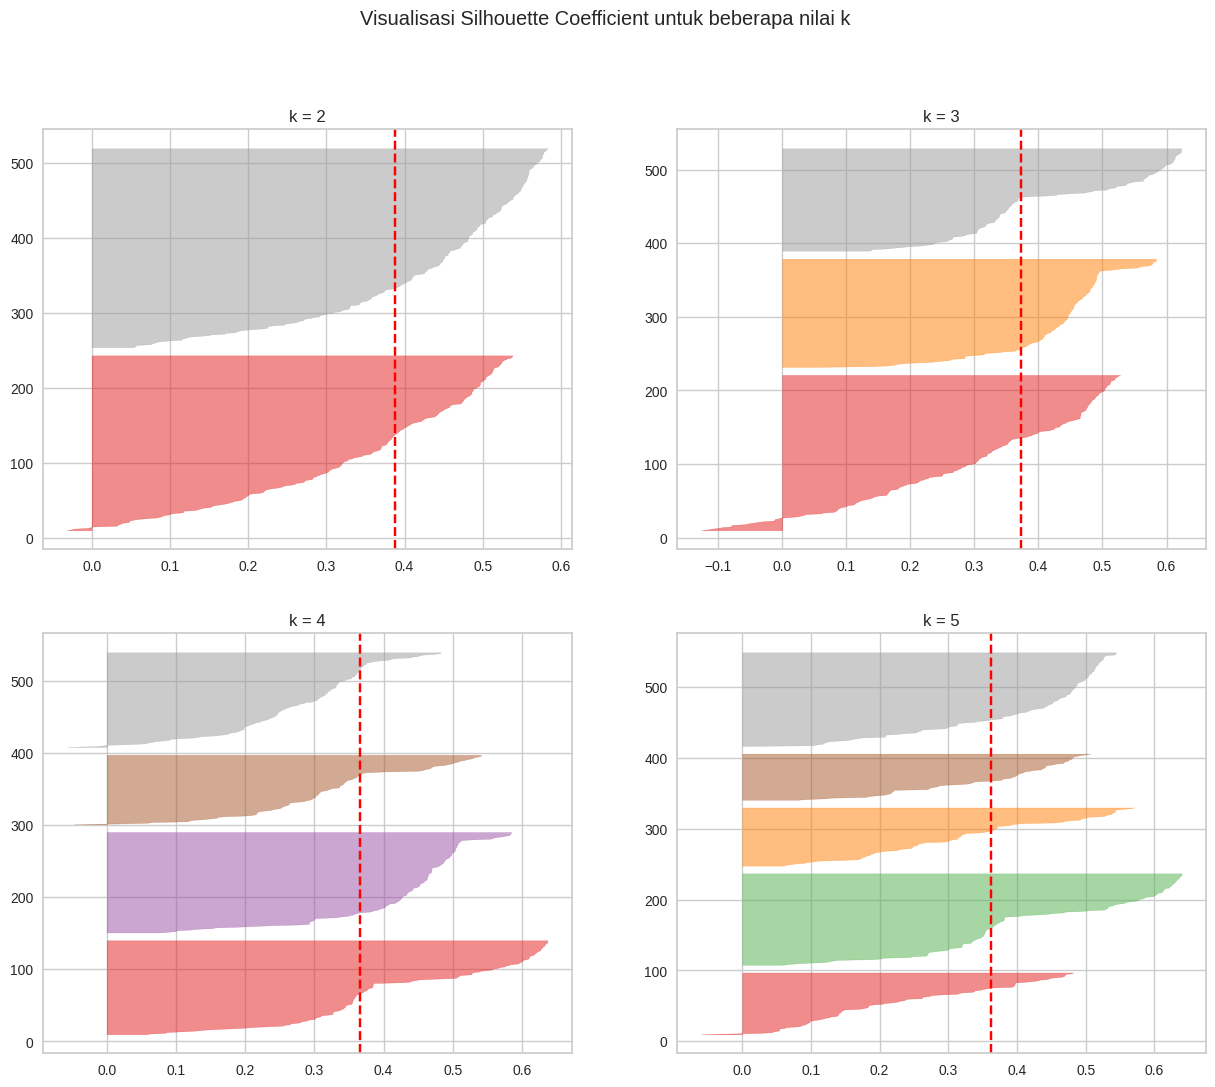

In [13]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_enc)

**Metrik Pendukung**
Metrik lain yang juga menjadi acuan untuk menentukan jumlah klaster adalah **Elbow Method**. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Pada nilai k yang tepat, akan muncul suatu "inflection point" di mana terjadi perubahan drastis pada gradien kurva.

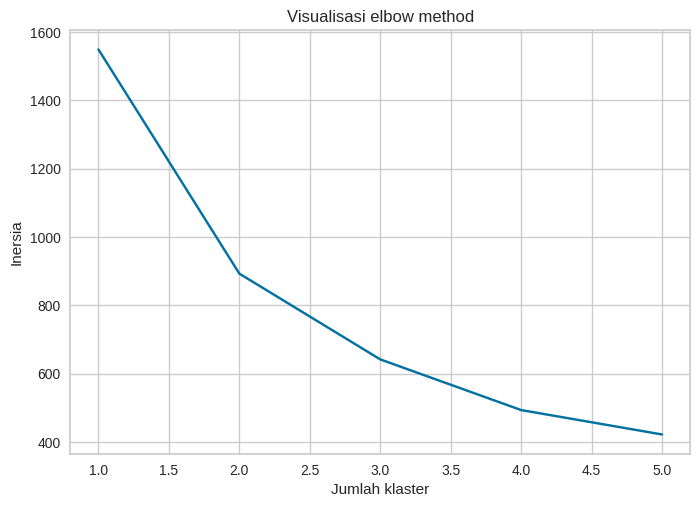

In [14]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Berdasarkan hasil metrik Silhouette Coeff. dan Elbow Method, data ini tidak menghasilkan klaster yang baik. Nilai $s(C)$ untuk `k = 2`, `k = 3`, `k = 4`, dan `k = 5` tidak jauh berbeda. Hal ini juga dibuktikan dari plot Elbow Method di atas: tidak ada inflection point yang perubahan gradiennya cukup drastis. Nilai K yang dipilih adalah `k = 2` karena nilai $s(C)$ untuk `k = 2` merupakan yang paling tinggi. Selain itu, perubahan gradien inersia di sebelah kiri `k = 2` paling drastis di antara keempat kandidat klaster

**Train Model**<br>
Latih model KMeans dengan memilih parameter cluster berdasarkan nilai k yang dipilih.

In [15]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_enc)

In [16]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_enc.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,1
1,-0.237632,-1.150565,1,1
2,0.952915,1.271677,2,0
3,-1.165702,-0.545004,2,1
4,0.325344,0.060556,3,0


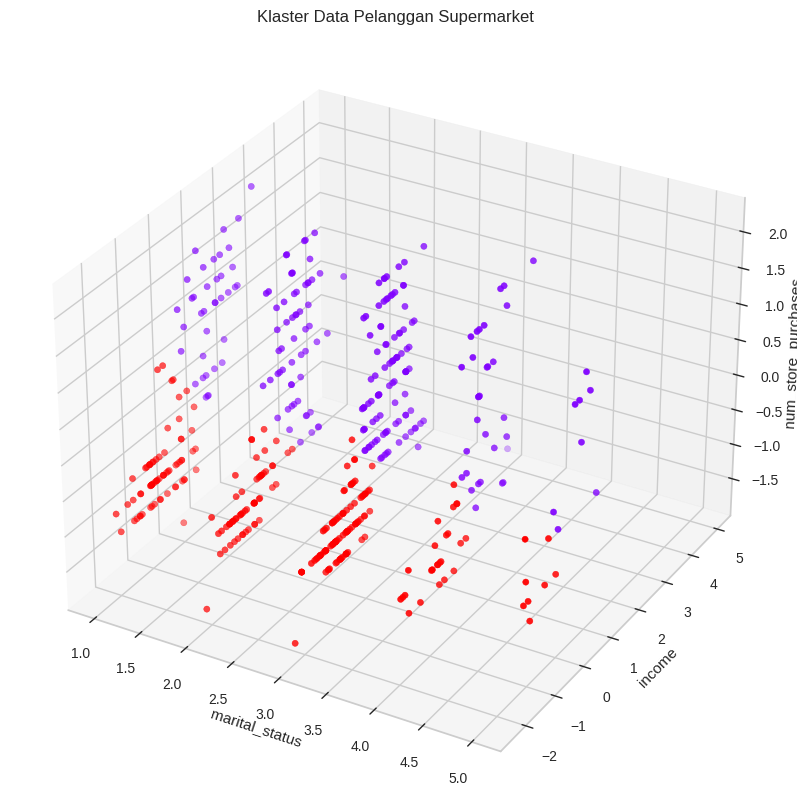

In [17]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['marital_status']
y = df_with_clusters['income']
z = df_with_clusters['num_store_purchases']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

> **Contoh interpretasi hasil**: Pada tiap kelas `marital_status` terdapat kedua jenis cluster, sehingga kelas `marital_status` tidak menentukan clustering secara signifikan. Di sisi lain, pola yang terlihat adalah cluster biru selalu berada di kiri cluster merah. Ini menandakan bahwa atribut `income` merupakan pemisah utama. Cluster merah juga memiliki `num_store_purchases` yang lebih merata dibandingkan cluster biru yang kebanyakan di bawah.

### Hierarchical (Agglomerative) Clustering
Berbeda dengan KMeans yang menentukan jumlah klaster kemudian mengevaluasinya, Agglomerative clustering mencari garis vertikal terpanjang yang menunjukkan pemisahan yang baik antara klaster yang terbentuk. Sebelum mengembangkan model untuk memprediksi klaster dari data, langkah pertama adalah menentukan jumlah klaster optimal berdasarkan visualisasi dendrogram.

Kita akan menggunakan dataset yang sama (`df_enc`) untuk pembuatan clustering hierarchical ini.

In [18]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_enc)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([307, 438, 499, 260, 342, 429, 367, 305, 497, 323, 310, 496, 357,
       421, 387, 295, 341, 493, 253, 451, 414, 495, 287, 435, 447, 266,
       368, 315, 280, 345, 351, 490, 316, 352, 296, 330, 376, 303, 349,
       445, 489, 401, 482, 249, 453, 491, 247, 263, 284, 293, 275, 257,
       297, 407, 424, 391, 397, 392, 462, 309, 255, 432, 365, 369, 317,
       418, 325, 413, 420, 422, 354, 416, 439, 476, 463, 264, 277, 466,
       443, 360, 436, 372, 474, 340, 302, 460, 409, 477, 398, 427, 198,
       175, 483, 390, 444, 492, 379, 262, 488, 380, 370, 389, 294, 465,
       415, 374, 411, 343, 478, 346, 431, 333, 417, 259, 450, 271, 308,
       258, 327, 467, 366, 322, 378, 400, 291, 388, 232, 468, 487, 375,
       383, 425, 441, 254, 464, 210, 326, 452, 217, 381, 384, 486, 243,
       162, 412, 290, 471, 475, 498, 406, 300, 473, 328, 157, 481, 449,
       371, 324, 225, 289, 184, 386, 183, 244, 448, 428, 359, 278, 399,
       306, 182, 238, 131, 298, 461, 208, 265, 240, 470, 394, 18

In [19]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

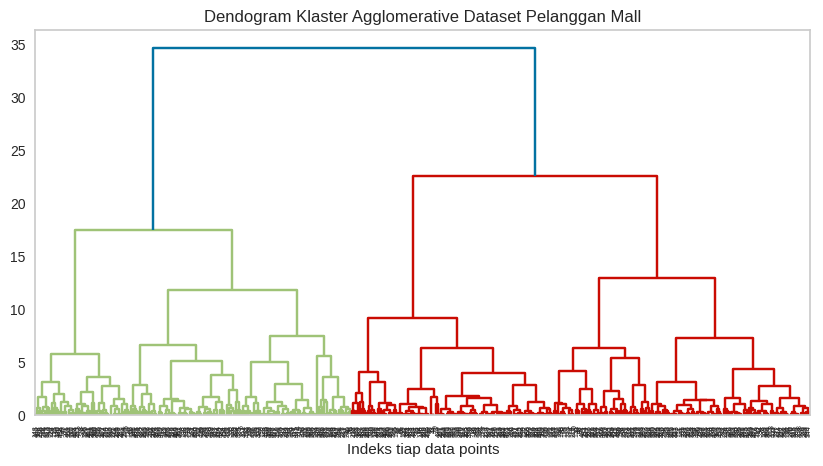

In [20]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

Secara rule-of-thumb, garis biru merupakan jumlah k yang optimal. Namun, berdasarkan dendogram yang dibentuk, data ini tidak menghasilkan klaster yang baik: panjang garis biru dan merah sebenarnya tidak jauh berbeda. Idealnya, garis biru akan jauh lebih panjang daripada garis-garis lainnya dan kita akan lebih mudah membuat batas threshold seperti di bawah ini.

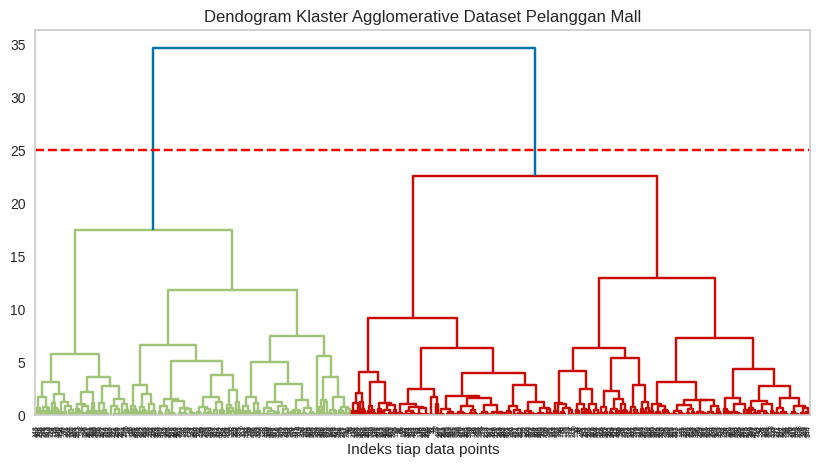

In [21]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 25, color = 'red', linestyle = 'dashed')
plt.show()

Selanjutnya, kita bisa membuat model Agglomerative Clustering dengan nilai k yang didapatkan sebelumnya. Setelah itu, visualisasikan hasil modelnya.

In [22]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_enc)

In [23]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_enc.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


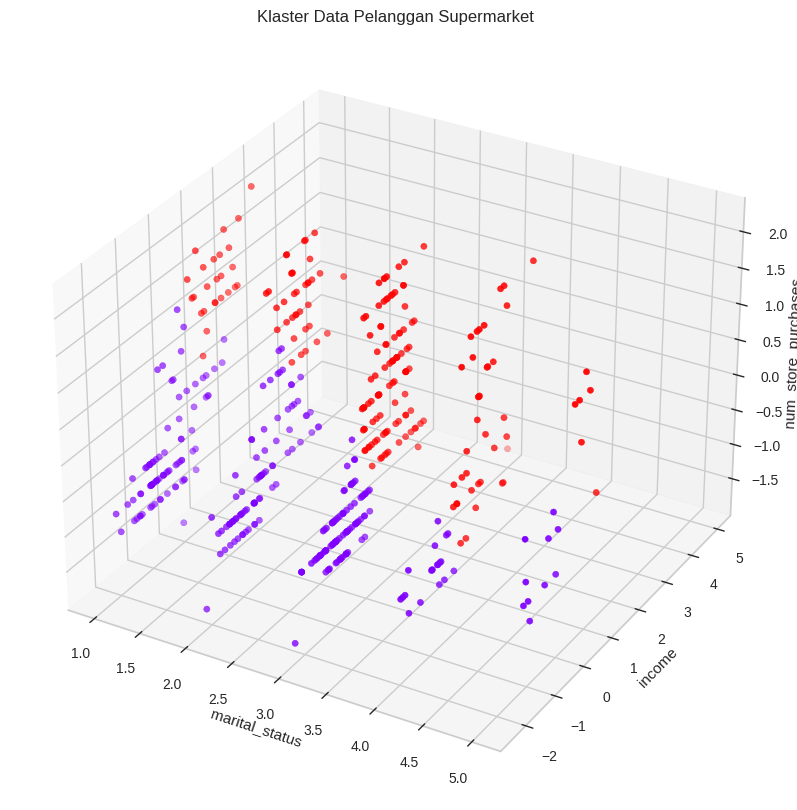

In [24]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['marital_status']
y = df_with_clusters_agg['income']
z = df_with_clusters_agg['num_store_purchases']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

## Latihan Clustering
### Deskripsi Dataset

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CUST_ID                    | ID pelanggan (Kategorikal)                 |
| BALANCE              | Saldo rekening pelanggan                |
| BALANCE_FREQUENCY  | Seberapa sering saldonya ter-update (1 = sering, 0 tidak) |
| PURCHASES                | Jumlah total pembelian        |
| ONEOFF_PURCHASES                | Jumlah pembelian maksimum        |
| INSTALLMENTS_PURCHASES                | Jumlah pembelian untuk kredit       |
| CASH_ADVANCE   | Uang tunai yang diberikan oleh pengguna        |
| PURCHASES_FREQUENCY  | Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)   |
| ONEOFFPURCHASESFREQUENCY  | Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = jarang dibeli)   |
| PURCHASESINSTALLMENTSFREQUENCY   | Seberapa sering pembelian dalam angsuran dilakukan (1 = sering dilakukan, 0 = jarang dilakukan) |
| CASHADVANCEFREQUENCY   | Seberapa sering uang tunai di muka dibayar   |
| CASHADVANCETRX   | Jumlah Transaksi yang dilakukan dengan CASH_ADVANCE   |
| PURCHASES_TRX     | Jumlah transaksi pembelian yang dilakukan              |
| CREDIT_LIMIT     | Batas Kartu Kredit untuk pengguna              |
| PAYMENTS   | Jumlah Pembayaran yang dilakukan oleh pengguna    |
| MINIMUM_PAYMENTS   | Jumlah pembayaran minimum yang dilakukan oleh pengguna  |
| PRCFULLPAYMENT   | Persentase pembayaran penuh yang dibayarkan oleh pengguna   |
| TENURE   | Masa pelayanan kartu kredit bagi pengguna |
> Data diambil dari [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [25]:
# load dataset
url = "https://raw.githubusercontent.com/farrelayman09/lab-kasdad-8/master/CC%20GENERAL.csv"

cc_df = pd.read_csv(url)
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
# melihat informasi dasar dataset
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
# melihat deskripsi statistik dataset
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [28]:
# drop id
cc_df = cc_df.drop('CUST_ID', axis=1)
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Soal 1: Preprocess Dataset

a) Pada tahap preprocessing dataset, persiapan yang dilakukan setidaknya perlu melakukan hal berikut:
- Mengecek dan menangani *missing values* dan data duplikat
- Menangani *outlier*
- Melakukan standarisasi
- Melakukan encoding pada atribut kategorikal

b) Jelaskan metode standarisasi yang dipilih beserta alasan (dan referensinya jika ada)

In [29]:
# handle missing values and duplicate

# mengecek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(cc_df)

                  Total   Percent
MINIMUM_PAYMENTS    313  3.497207
CREDIT_LIMIT          1  0.011173


In [30]:
# karena jumlah null value kecil, kita drop
cc_df = cc_df.dropna()
cek_null(cc_df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [31]:
# mengecek duplicate
def cek_duplikat(df):
  data_duplicate = df.duplicated()
  duplicate_arr = df[data_duplicate]

  if (duplicate_arr.shape[0] > 0):
    print("Terdapat", duplicate_arr.shape[0], "pasang data yang duplikat")
    print("Berikut ini data yang duplikat: ")
    display(duplicate_arr)

  else:
    print("Tidak ada data yang duplikat")

cek_duplikat(cc_df)

Tidak ada data yang duplikat


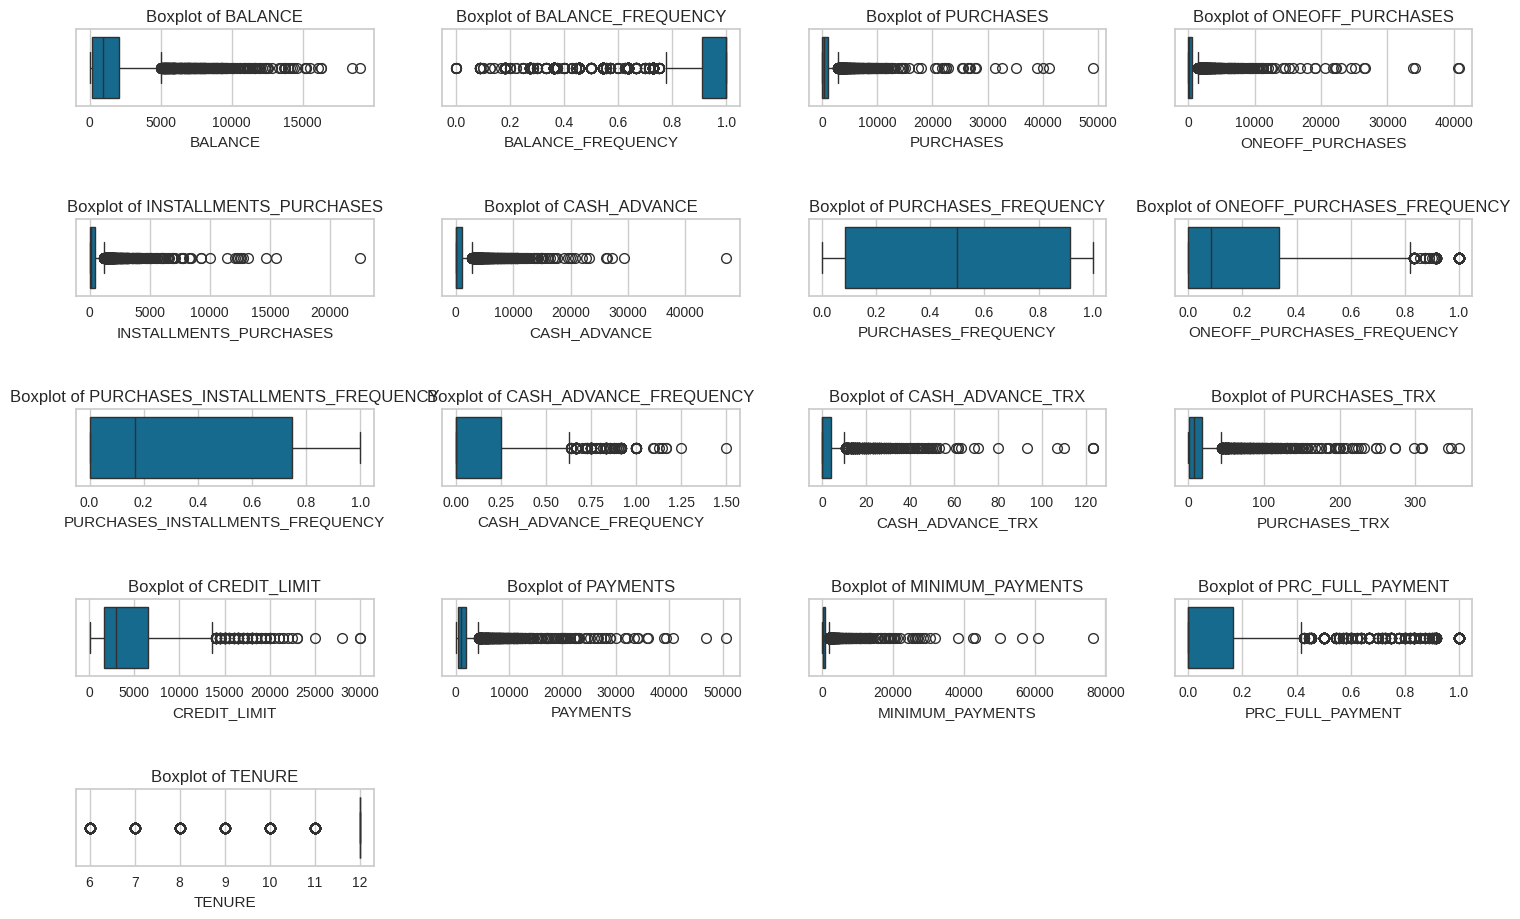

In [32]:
# handle outlier
def show_boxplot(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_columns = df.select_dtypes(include=numeric_types).columns

    max_boxplots_per_row = 4
    num_numeric_cols = len(numeric_columns)

    # Calculate the number of rows needed
    num_rows = (num_numeric_cols // max_boxplots_per_row) + (1 if num_numeric_cols % max_boxplots_per_row > 0 else 0)

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=max_boxplots_per_row, figsize=(15, 2 * num_rows))
    axes = axes.flatten()

    # Create a boxplot for each numeric column
    for ax, column in zip(axes, numeric_columns):
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f'Boxplot of {column}')

    # Hide unused subplots
    for ax in axes[num_numeric_cols:]:
        ax.set_visible(False)

    plt.tight_layout(pad=3)
    plt.show()

show_boxplot(cc_df)

In [33]:
def outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        filter = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 *IQR)
        print(df[filter][col].sort_values())
        print("Percentage of outliers: ", len(df[filter][col])/len(df)*100)
        print("---------------------------------")

outliers(cc_df)

5298     5044.179003
1029     5049.442457
1690     5052.910787
430      5055.582822
3490     5055.816826
            ...     
5281    16115.596400
6629    16259.448570
5488    16304.889250
4140    18495.558550
138     19043.138560
Name: BALANCE, Length: 666, dtype: float64
Percentage of outliers:  7.711903659101436
---------------------------------
7440    0.00
4937    0.00
1574    0.00
7673    0.00
7834    0.00
        ... 
8876    0.75
8864    0.75
5306    0.75
7975    0.75
6434    0.75
Name: BALANCE_FREQUENCY, Length: 1511, dtype: float64
Percentage of outliers:  17.496526169522927
---------------------------------
6249     2800.12
2687     2802.08
8897     2806.78
1240     2808.20
6818     2811.86
          ...   
3937    35131.16
1604    38902.71
1256    40040.71
501     41050.40
550     49039.57
Name: PURCHASES, Length: 768, dtype: float64
Percentage of outliers:  8.89300602130616
---------------------------------
2786     1499.12
4576     1500.00
1981     1500.00
815      1500.0

Dari hasil di atas, mayoritas hasil data memiliki outlier, tetapi masih wajar. Misal INSTALLMENT_PURCHASES dengan nilai maks 22500 yang masih outlier wajar dibandingkan data-data lain, ataupuun BALANCE dengan 19000 yang bisa saja terjadi melewati ketika melewati credit_limit. Kebanyakan fitur memiliki sifat outlier seperti di atas di mana masih valid dan wajar. Karena itu mayoritas akan di-keep. Namun terdapat fitur yang perlu dihandle, yakni MINIMUM_PAYMENTS di mana dia harus kurang dari sama dengan PAYMENTS

In [34]:
# Using apply with a lambda function to adjust 'MINIMUM_PAYMENTS'
cc_df['MINIMUM_PAYMENTS'] = cc_df.apply(lambda row: min(row['MINIMUM_PAYMENTS'], row['PAYMENTS']), axis=1)

cc_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,622.066742,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,1400.057770,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,52.549959,0.250000,6


In [35]:
# standarisasi

from sklearn.preprocessing import RobustScaler

rScaler = RobustScaler()
cc_df_scaled = rScaler.fit_transform(cc_df)
cc_df_scaled = pd.DataFrame(cc_df_scaled, columns=cc_df.columns)
cc_df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.447578,-2.000000,-0.253947,-0.075104,0.001270,0.000000,-0.399999,-0.249999,-0.111112,0.000000,0.0,-0.294118,-0.408163,-0.453400,-0.270030,0.000000,0.0
1,1.167856,-1.000000,-0.340469,-0.075104,-0.195777,5.689710,-0.600000,-0.249999,-0.222223,1.000000,1.0,-0.411765,0.816327,2.092126,1.566155,1.333329,0.0
2,0.806445,0.000000,0.360748,1.215448,-0.195777,0.000000,0.600000,2.750004,-0.222223,0.000000,0.0,0.294118,0.918367,-0.179180,0.679836,0.000000,0.0
3,-0.050657,0.000000,-0.325958,-0.048398,-0.195777,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.0,-0.352941,-0.367347,-0.142466,-0.062794,0.000000,0.0
4,0.456274,0.000000,0.868732,-0.075104,2.558094,0.000000,0.200000,-0.249999,0.555555,0.000000,0.0,0.058824,-0.244898,0.328453,2.211235,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.465476,-5.500006,-0.321514,-0.040219,-0.195777,0.000000,-0.399999,0.250002,-0.222223,0.000000,0.0,-0.352941,-0.510204,-0.546809,-0.459067,0.000000,-6.0
8632,-0.453917,0.000000,-0.076441,-0.075104,0.405527,0.000000,0.600000,-0.249999,0.888888,0.000000,0.0,-0.058824,-0.408163,-0.372627,-0.448413,2.999994,-6.0
8633,-0.456521,-1.833339,-0.209507,-0.075104,0.102479,0.000000,0.399999,-0.249999,0.666667,0.000000,0.0,-0.117647,-0.408163,-0.532046,-0.384668,1.499997,-6.0
8634,-0.461600,-1.833339,-0.340469,-0.075104,-0.195777,0.032285,-0.600000,-0.249999,-0.222223,0.666668,0.5,-0.411765,-0.510204,-0.550786,-0.441202,1.499997,-6.0


In [36]:
# encoding

# encoding tidak dilakukan karena tidak ada categorical data

> Tuliskan alasan pemilihan standarisasi ...<br>
Saya menggunakan RobustScaler pada dataset ini karena dia less sensitive terhadap outliers dibandingkan standardization dan cocok dengan dataset ini yang memiliki banyak outlier

### Soal 2: K-Means Clustering

a) Buatlah dataset baru yang hanya memiliki fitur (kolom) pilihan. Pilih setidaknya 3 fitur, mencakup fitur numerik dan kategorikal, dan jelaskan alasan pemilihan fitur tersebut. Dataset ini akan digunakan untuk melakukan clustering

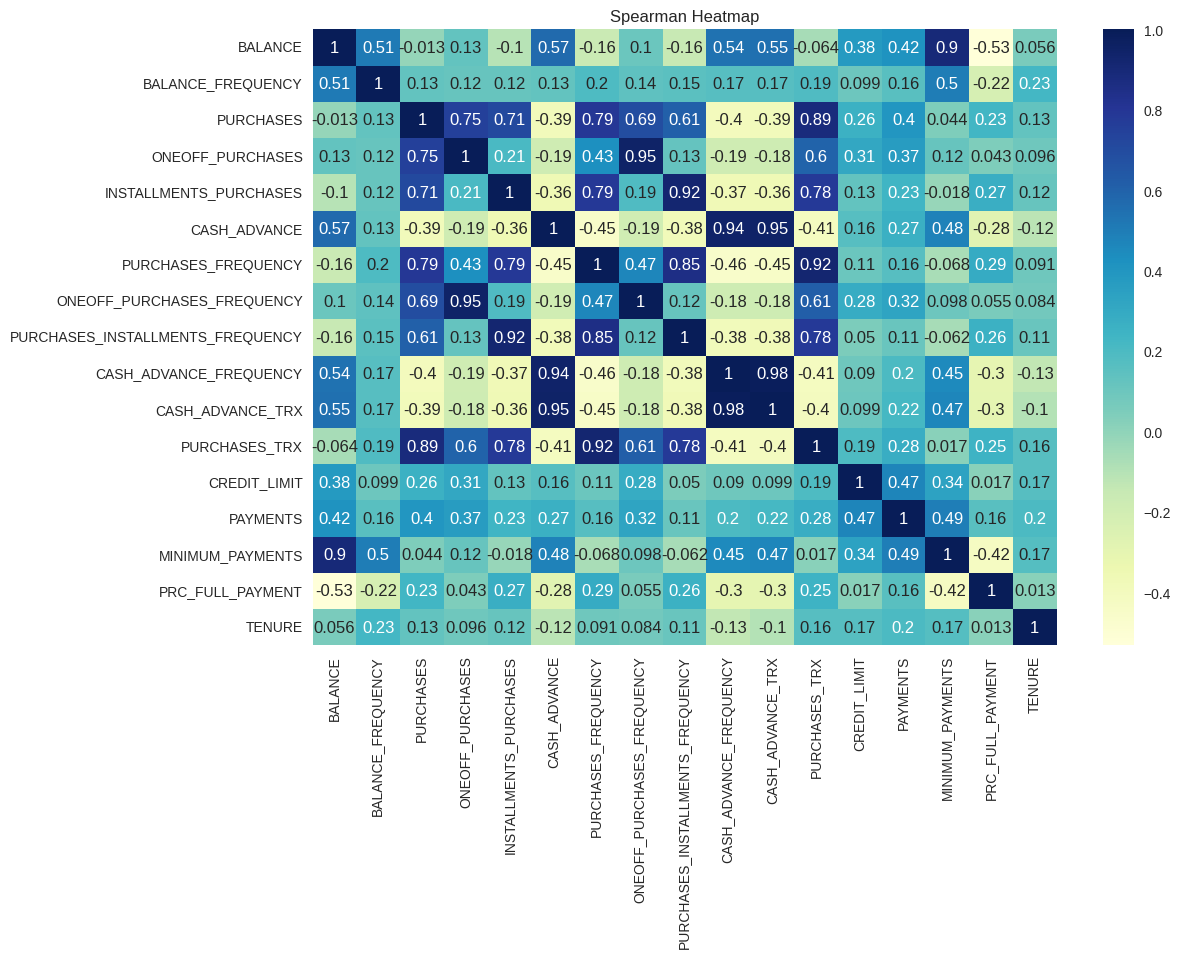

In [37]:
# membuat dataset baru
plt.figure(figsize=(12, 8))

dataplot = sns.heatmap(cc_df_scaled.corr(method = 'spearman', numeric_only=True), cmap="YlGnBu", annot=True)
plt.title("Spearman Heatmap")

# displaying heatmap
plt.show()


In [38]:
# membuat dataset baru
selected_features = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX']
cc_df_selected = cc_df_scaled[selected_features]
cc_df_selected

,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
0,0.000000,0.000000,0.0
1,5.689710,1.000000,1.0
2,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0
...,...,...,...
8631,0.000000,0.000000,0.0
8632,0.000000,0.000000,0.0
8633,0.000000,0.000000,0.0
8634,0.032285,0.666668,0.5


Dari correlation heatmap Pearson di atas, saya memilih 3 fitur yang memiliki pola korelasi tinggi. Fitur tersebut, yakni CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX. Saya memilih ketiga fitur ini karena saya juga ingin menggali lebih dalam kelompok pelanggan dengan tingkat uang tunai dibayar di muka yang tinggi atau sering. Dengan seleksi ketiga fitur ini, diharapkan cluster yang terbentuk akan berupa tipe customer cash advance berdasarkan perilaku pembayaran tunai di muka seperti jumlah, frekuensi, dan seberapa banyak ia telah melakukan pembayaran tunai di muka.

b) Hitung dan visualisasikan nilai Silhouette Coefficient untuk dataset sebelumnya. Berikan interpretasi hasilnya

In [39]:
# visualisasi silhouette coefficient

for k in range(2,12):
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(cc_df_selected)
    silhouette_avg = silhouette_score(cc_df_selected, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.7347611139382955
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.6891159745178153
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.6581202135556156
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.6651953439402739
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.6522737923361489
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.6461228087455814
Untuk k = 8, rata-rata silhouette_coefficient adalah: 0.6470880312040427
Untuk k = 9, rata-rata silhouette_coefficient adalah: 0.6473409483572351
Untuk k = 10, rata-rata silhouette_coefficient adalah: 0.6403776867976331
Untuk k = 11, rata-rata silhouette_coefficient adalah: 0.6429866418508118


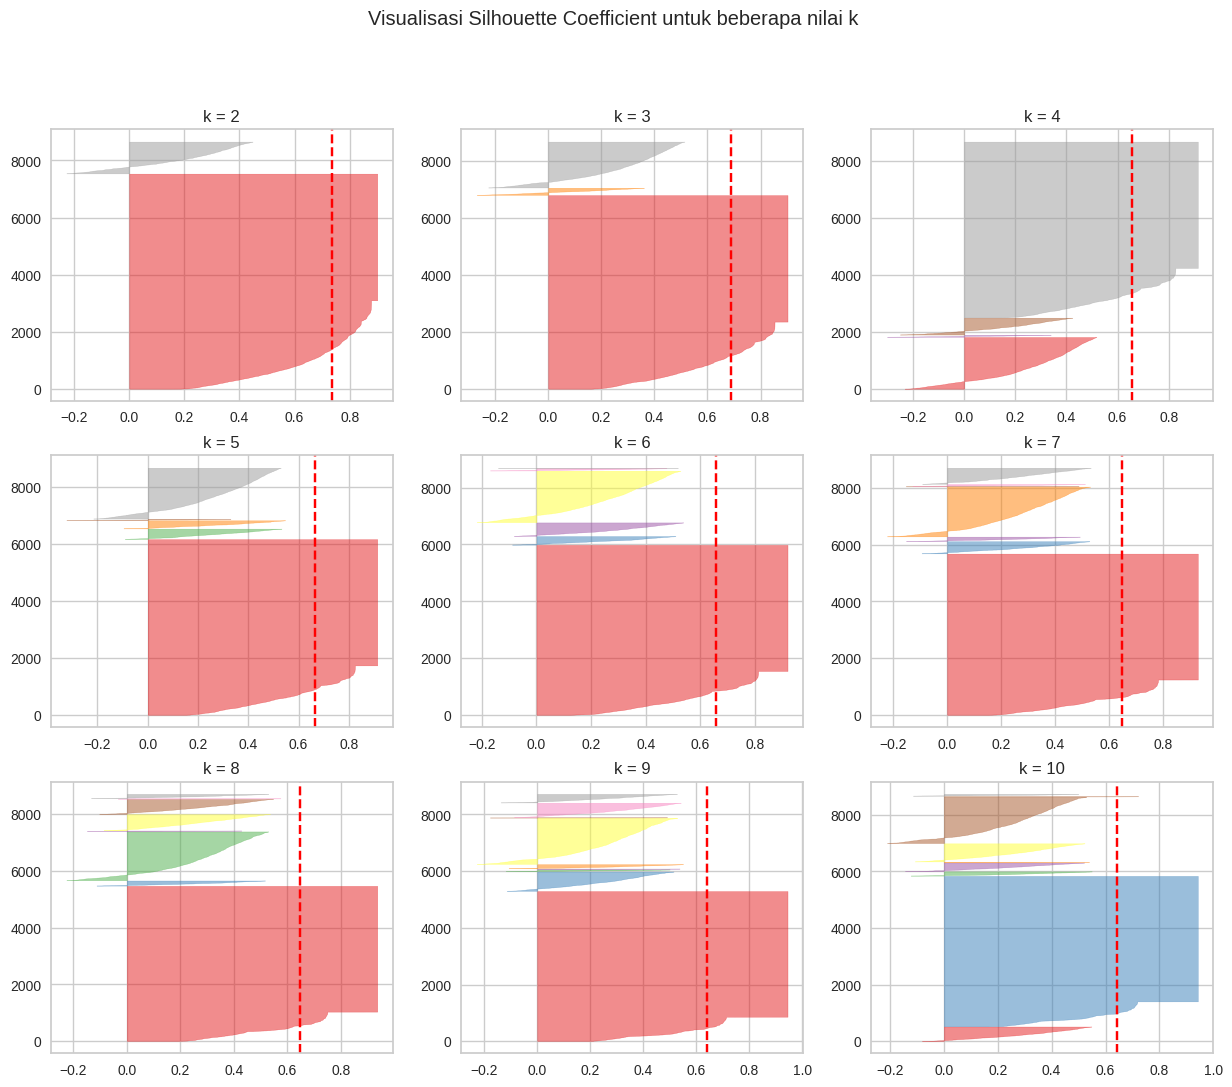

In [40]:
fig, ax = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [i for i in range(2, 11)]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k-2, 3)
    ax[q][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q][mod])
    visualizer.fit(cc_df_selected)

> Tuliskan interpretasi hasil...<br>
> Dapat dilihat bahwa silhouette coefficient untuk k=2 adalah yang paling tinggi. Nilai tersebut juga relatif berbeda dengan k=3,4,5,dll. Dari sini dapat diinterpretasi ketika k=2, setiap datapoint pada tiap cluster sangat similar terhadap data point lainnya pada clusternya, dan tidak similar terhadap data point pada cluster yang berbeda sehingga menunjukkan cluster yang paling baik terdefinisi. Cluster ini juga memiliki suatu point pada left side yang mendekati -1 mengindikasikan bahwa samples mungkin assigned to the wrong cluster. Namun, ini lebih baik dibandingkan cluster-cluster selanjutnya yang memiliki assigned wrong cluster lebih banyak. Kejadian ini menjadi indikasi  bahwa data points menjadi lebih tidak similar dengan data point lainnya pada clusternya tetapi akan menjadi lebih similar terhadap data point pada cluster yang berbeda


c) Tampilkan visualisasi elbow method dengan suatu rentang nilai k (bisa berbeda) dan jelaskan perbandingannya dengan nilai Silhouette Coefficient yang didapatkan sebelumnya. Setelah itu, **pilih nilai k yang optimal** berdasarkan keduanya.

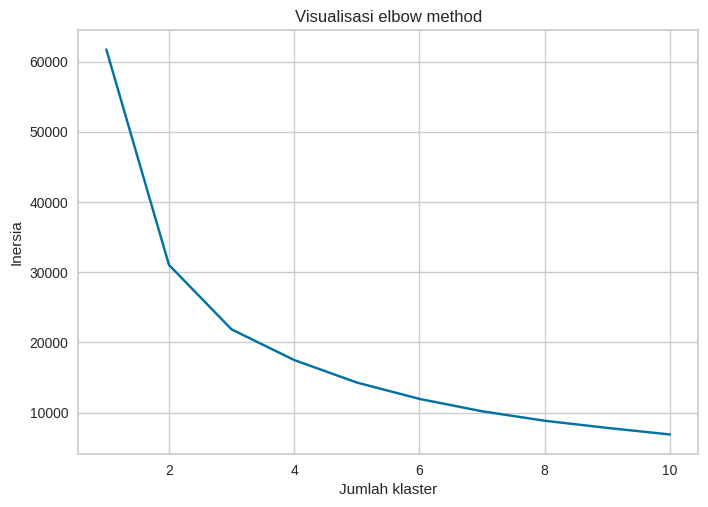

In [41]:
# elbow method

inertia = []
for cluster in range(1, 11):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(cc_df_selected)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

> Tuliskan interpretasi...<br>
dapat dilihat bahwa perubahan gradien kurva pada k = 2 paling terlihat daripada yang lain, dan sedikit lebih tinggi daripada k = 3 dan k = 4 dengan cluster selain ketiga ini relatif landai. Dengan itu, dapat diinterpretasi bahwa k=2 dapat menghasilkan cluster yang lebih bermakna dan lebih berkualitas. Berdasarkan Silhouette Coefficient tadi juga nilai silhouette coefficient k=2 paling tinggi serta visualisasi yang menujukkan k=2 dengan kandidat yang paling baik, maka dapat disimpulkan bahwa pemilihan k=2 adalah coefficient paling optimal pada kasus ini.

d) Latih model KMeans dengan **nilai k yang sudah ditentukan** sebelumnya. Visualisasikan hasil clustering dan berikan interpretasi hasilnya.

In [42]:
# latih
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(cc_df_selected)

In [43]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(cc_df_selected.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,cluster
0,0.00000,0.0,0.0,1
1,5.68971,1.0,1.0,0
2,0.00000,0.0,0.0,1
3,0.00000,0.0,0.0,1
4,0.00000,0.0,0.0,1


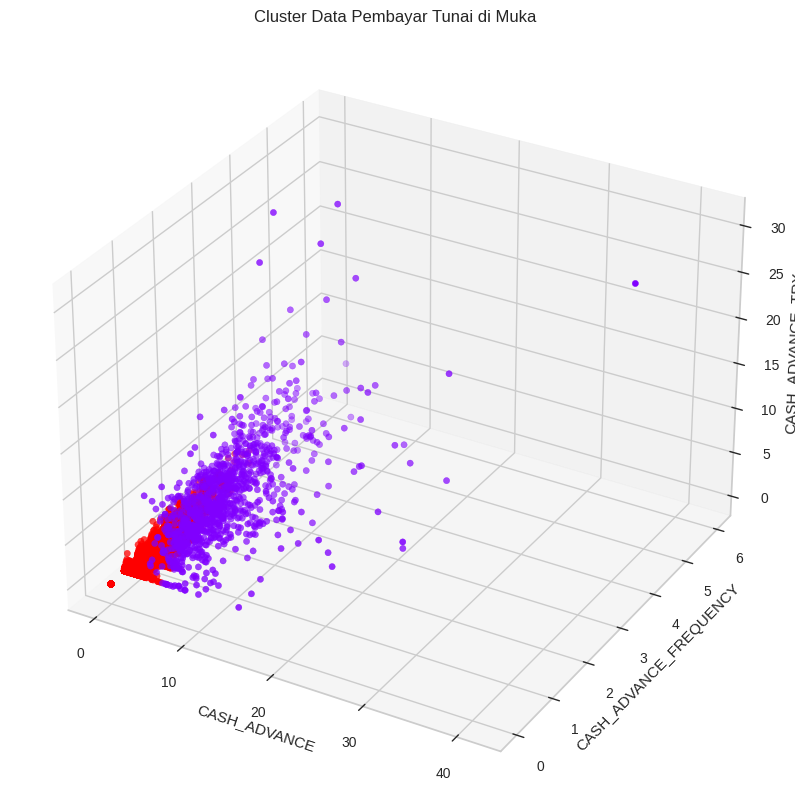

In [44]:
# visualisasi

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['CASH_ADVANCE']
y = df_with_clusters['CASH_ADVANCE_FREQUENCY']
z = df_with_clusters['CASH_ADVANCE_TRX']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Cluster Data Pembayar Tunai di Muka")
plt.grid(False)
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('CASH_ADVANCE_TRX')

plt.show()

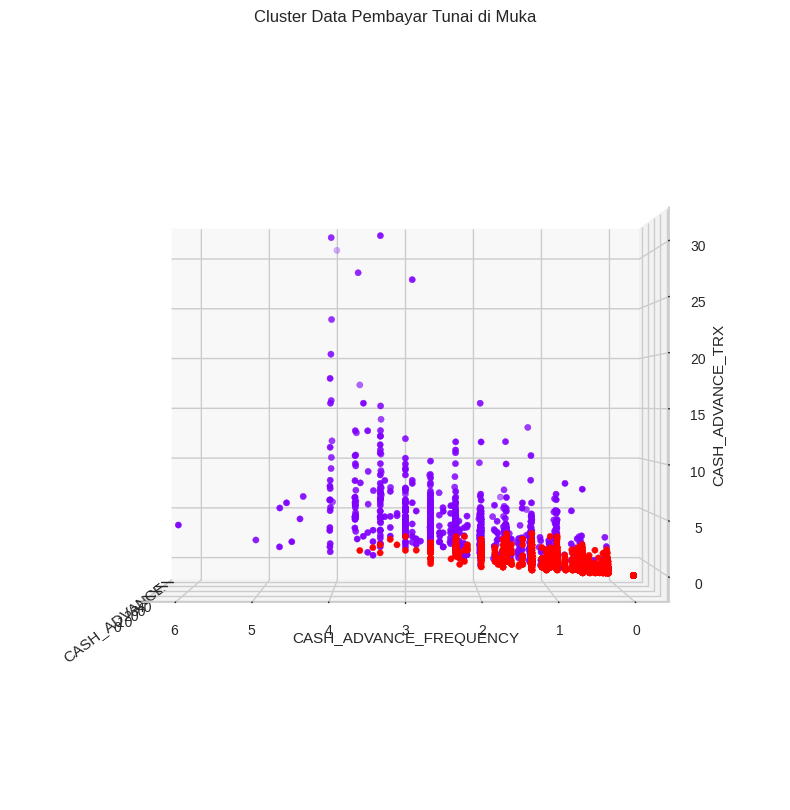

In [45]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['CASH_ADVANCE']
y = df_with_clusters['CASH_ADVANCE_FREQUENCY']
z = df_with_clusters['CASH_ADVANCE_TRX']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Change the viewing angle
ax.view_init(elev=0, azim=180)

plt.title("Cluster Data Pembayar Tunai di Muka")
plt.grid(False)
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('CASH_ADVANCE_TRX')

plt.show()

> Tuliskan interpretasi ... <br>
pada fitur CASH_ADVANCE terlihat bahwa cluster biru lebih tersebar dan mencakup area lebih luas daripada cluster merah.
Hal ini dapat menunjukkan bahwa fitur CASH_ADVANCE dapat menjadi pemisah utama antara dua cluster, dengan cluster biru mungkin mewakili pembayar tunai di muka yang lebih aktif dalam melakukan pembelian dengan jumlah yang relatif besar. Kemudian, pada fitur CASH_ADVANCE_FREQUENCY, terdapat juga dua jenis cluster dalam kelas frekuensi tersebut. Terlihat bahwa cluster biru selalu memiliki nilai frekuensi pembayaran tunai di muka yang lebih tinggi dibandingkan dengan cluster merah. Hal ini meng-emphasize poin pertama di mana mungkin cluster ini mewakili pembayar tunai di muka yang lebih sering/aktif. Terakhir, dari CASH_ADVANCE_TRX, beberapa data cluster biru terkena overlapping oleh data cluster merah di bawahnya. Namun, mayoritas cluster biru terlihat lebih tinggi dengan sebaran lebih tinggi dari merah. Terlihat juga bahwa nilai maks dari cluster biru yakni CASH_ADVANCE_TRX sekitar 35, sementara maks dari cluster merah, yakni CASH_ADVANCE_TRX di bawah 5. Ini mungkin dapat menjadi indikator di mana fitur CASH_ADVANCE_TRX bisa menjadi pemisah utama dengan splitting point pada CASH_ADVANCE_TRX = 5 pada visualisasinya, di mana nilai transaksi di atas 5 memisahkan dengan jelas antara cluster pengguna yang lebih aktif dan yang kurang aktif dalam melakukan pembayaran tunai di muka.

### Soal 3: Hierarchical Clustering

a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [46]:
# agglomerative

agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(cc_df_scaled)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([7739, 6255, 7211, ...,    1,    2,    0])

b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

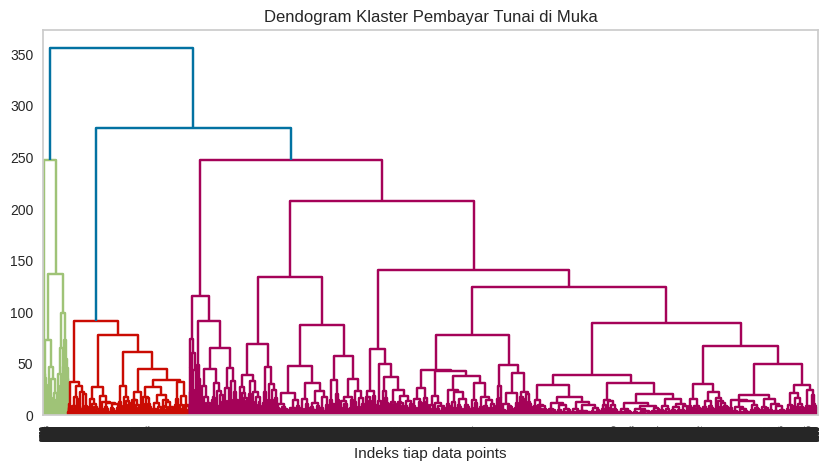

In [47]:
# dendogram
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Pembayar Tunai di Muka")
plt.xlabel("Indeks tiap data points")
plt.show()

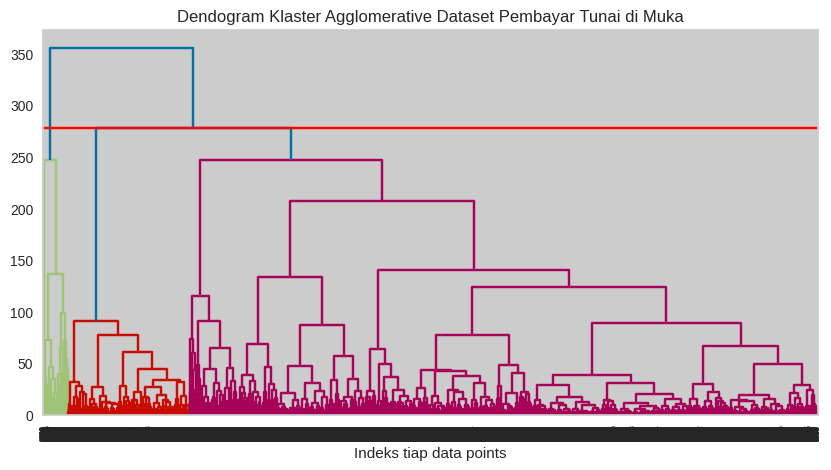

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(cc_df_scaled, 'ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendogram Klaster Agglomerative Dataset Pembayar Tunai di Muka")
plt.xlabel("Indeks tiap data points")

distances = linked[:, 2]
idx = np.argmax(np.diff(distances))
max_d = distances[idx]
plt.axhline(y=max_d, c='red')

plt.show()

> Tuliskan interpretasi hasil...<br>
Berdasarkan visualisasi di atas, garis vertikal terpanjang berada pada garis biru  paling atas. Karena batas threshold berada pada garis biru tersebut, maka jumlah klaster yang optimal adalah 2 (1 cluster dari cluster hijau, 1 cluster dari cluster merah dan magenta)


c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering dan bandingkan hasilnya dengan hasil clustering KMeans.

In [48]:
# latih

agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(cc_df_scaled)

df_with_clusters_agg = pd.DataFrame(cc_df_scaled.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.447578,-2.0,-0.253947,-0.075104,0.001270,0.00000,-0.399999,-0.249999,-0.111112,0.0,0.0,-0.294118,-0.408163,-0.453400,-0.270030,0.000000,0.0,0
1,1.167856,-1.0,-0.340469,-0.075104,-0.195777,5.68971,-0.600000,-0.249999,-0.222223,1.0,1.0,-0.411765,0.816327,2.092126,1.566155,1.333329,0.0,0
2,0.806445,0.0,0.360748,1.215448,-0.195777,0.00000,0.600000,2.750004,-0.222223,0.0,0.0,0.294118,0.918367,-0.179180,0.679836,0.000000,0.0,0
3,-0.050657,0.0,-0.325958,-0.048398,-0.195777,0.00000,-0.500000,0.000000,-0.222223,0.0,0.0,-0.352941,-0.367347,-0.142466,-0.062794,0.000000,0.0,0
4,0.456274,0.0,0.868732,-0.075104,2.558094,0.00000,0.200000,-0.249999,0.555555,0.0,0.0,0.058824,-0.244898,0.328453,2.211235,0.000000,0.0,0


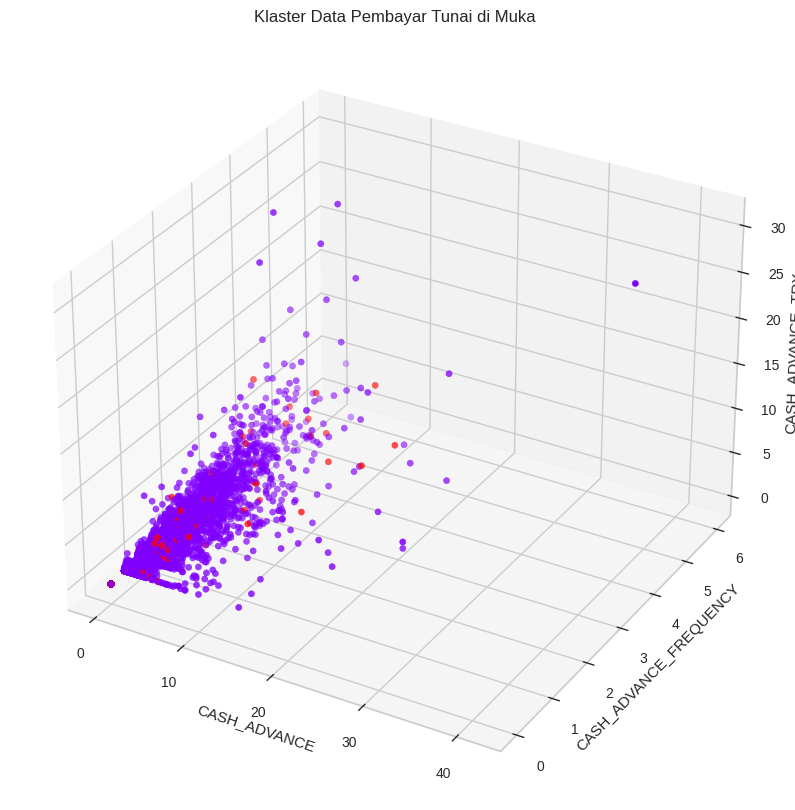

In [49]:
# visualisasi

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters_agg['CASH_ADVANCE']
y = df_with_clusters_agg['CASH_ADVANCE_FREQUENCY']
z = df_with_clusters_agg['CASH_ADVANCE_TRX']
cluster = df_with_clusters_agg['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pembayar Tunai di Muka")
plt.grid(False)
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('CASH_ADVANCE_TRX')

plt.show()

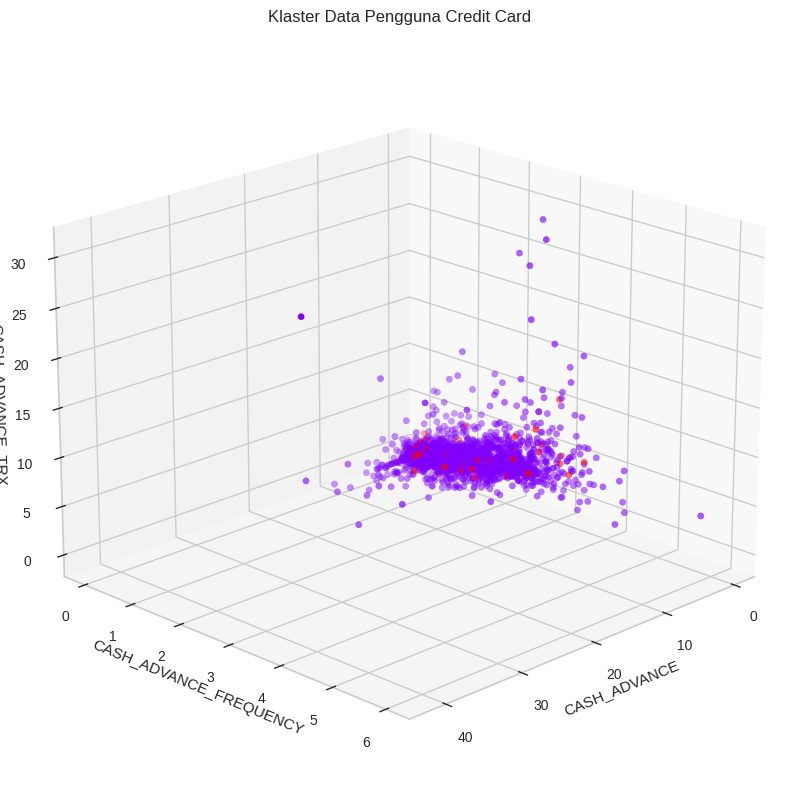

In [51]:
# visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters_agg['CASH_ADVANCE']
y = df_with_clusters_agg['CASH_ADVANCE_FREQUENCY']
z = df_with_clusters_agg['CASH_ADVANCE_TRX']
cluster = df_with_clusters_agg['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Change the viewing angle
ax.view_init(elev=20, azim=45)

plt.title("Klaster Data Pengguna Credit Card")
plt.grid(False)
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('CASH_ADVANCE_TRX')

plt.show()

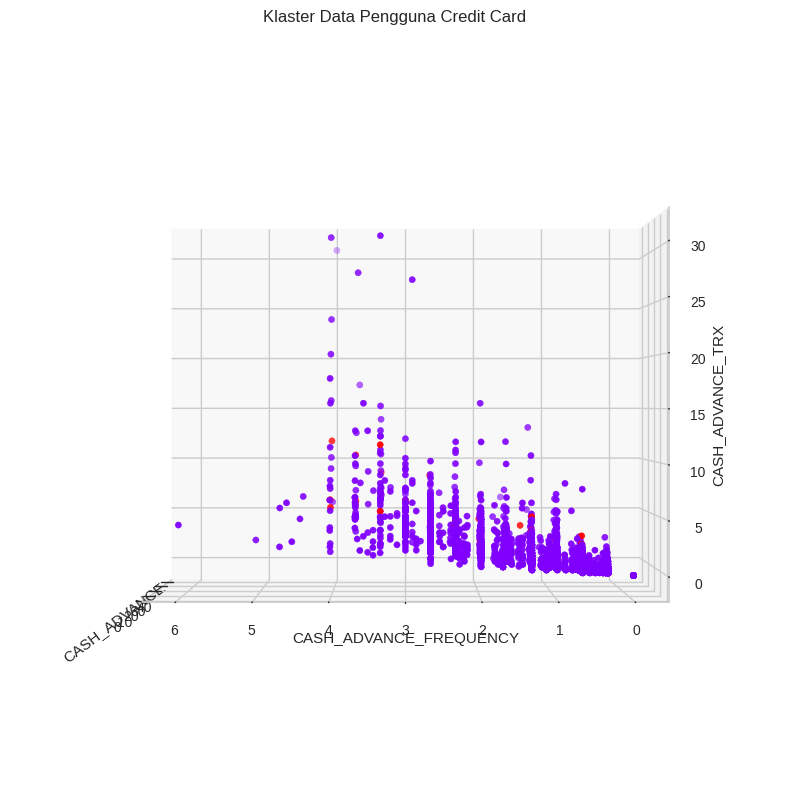

In [50]:
# visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters_agg['CASH_ADVANCE']
y = df_with_clusters_agg['CASH_ADVANCE_FREQUENCY']
z = df_with_clusters_agg['CASH_ADVANCE_TRX']
cluster = df_with_clusters_agg['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Change the viewing angle
ax.view_init(elev=0, azim=180)

plt.title("Klaster Data Pengguna Credit Card")
plt.grid(False)
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('CASH_ADVANCE_TRX')

plt.show()

> Tuliskan interpretasi hasil...<br>
Dapat dilihat langsung bahwa hierarchical clustering membentuk cluster-cluster di mana cluster biru meng-overlap mayoritas cluster merah. Hal ini dapat mengimplikasikan bahwa cluster tak berformasi sebaik  KMean. Overlapping ini terjadi pada hampir tiap axis entah CASH ADVANCE, CASH_ADVANCE_FREQUENCY, ataupun CASH_ADVANCE_TRX (hanya sedikit data yang tidak terkena overlapping). Dengan itu, dapat diinterpretasi juga bahwa CASH_ADVANCE_TRX yang sebelumnya dapat mengakomodasi splitting point yang relatif baik pada KMean, sekarang tidak terlalu cocok pemisah utama lagi karena dapat dilihat pada CASH_ADVANCE_TRX sekarang, cluster biru dan merah lebih  overlapping dibandingkan ketika pada Kmean. Hal-hal tersebut mungkin menunjukkan bahwa metode Hierarchical Clustering ini kurang baik untuk mendefinisikan clustering dari fitur-fitur yang telah dipilih.

### Soal 4: Latihan Teoretis
a) Jelaskan 2 metrik evaluasi yang digunakan dalam lab ini!<br>

   >- Silhouette Coefficient digunakan untuk menilai seberapa mirip suatu objek dengan klasternya sendiri dibandingkan dengan klaster lain. Nilai koefisien ini berkisar antara -1 dan 1. Nilai mendekati 1 menunjukkan bahwa sampel tersebut sangat berbeda dari klaster lainnya. Nilai mendekati 0 menunjukkan bahwa sampel tersebut berada di atau sangat dekat dengan batas antara dua klaster yang berdekatan. Sementara itu, Nilai negatif biasanya menunjukkan bahwa sampel telah ditempatkan di klaster yang salah.<br>
>
>- Elbow Method digunakan untuk menentukan jumlah klaster optimal dalam pengelompokan data. Cara kerjanya adalah dengan menampilkan plot inersia untuk berbagai nilai k, yang menunjukkan seberapa baik klaster yang dihasilkan sesuai dengan datanya. Pada nilai k yang optimal, akan terlihat titik "inflection point" di mana terjadi perubahan tajam pada gradien kurva.

b) Jelaskan cara menghitung intra-cluster similarity dan inter-cluster dissimilarity!
   > Intra-cluster similarity biasanya diukur dengan menghitung jarak antara semua pasangan objek dalam klaster yang sama dan kemudian mengambil rata-rata atau total dari jarak tersebut. Jarak bisa diukur dengan berbagai cara, seperti jarak Euclidean atau Manhattan. Sementara itu,inter-cluster dissimilarity biasanya dihitung sebagai jarak antara centroid (rata-rata atau titik pusat) di cluster atau sebagai jarak minimum antara titik data dalam cluster yang berbeda.


c) K-Means adalah algoritma yang bekerja baik untuk data globular, tetapi tidak untuk data yang memiliki klaster sembarang. Apa yang akan terjadi apabila K-Means dipakai untuk kasus tersebut?
   > Menurut saya, jika algoritma K-Means diterapkan pada data dengan klaster yang tidak beraturan, hasilnya mungkin tidak optimal. Algoritma K-Means cenderung mencari klaster yang berbentuk bulat dan berukuran serupa. Oleh karena itu, jika klaster dalam data sebenarnya tidak berbentuk bulat atau memiliki ukuran yang sangat bervariasi, K-Means mungkin tidak dapat mengidentifikasinya dengan baik. Misalnya, jika klaster sebenarnya berbentuk memanjang atau seperti cincin, K-Means mungkin akan membaginya menjadi beberapa klaster bulat. Atau, jika beberapa klaster berbentuk seperti bulan sabit atau spiral, K-Means akan mencoba membagi data menjadi bagian yang lebih kecil dengan bentuk bulat, yang menghasilkan pengelompokan yang tidak sesuai dengan struktur alami data tersebut.

d) Jika kita menjalankan `sklearn.cluster.KMeans` berulang kali, apakah akan selalu didapatkan hasil yang sama?
   > Jika kita menjalankan sklearn.cluster.KMeans berulang kali, hasilnya tidak akan selalu sama. Ini disebabkan oleh cara kerja algoritma K-Means, yang biasanya dimulai dengan pemilihan acak titik awal untuk centroid. Oleh karena itu, pemilihan titik awal yang berbeda dapat menghasilkan hasil clustering yang berbeda. Namun, kita dapat memastikan bahwa K-Means memberikan hasil yang konsisten dengan menetapkan parameter random_state sebagai seed untuk generator angka acak yang digunakan untuk memilih titik awal saat kita membuat objek KMeans.